# Genes shared by *H. inflata, Trepomonas, C. membranifera*
marked as green-red


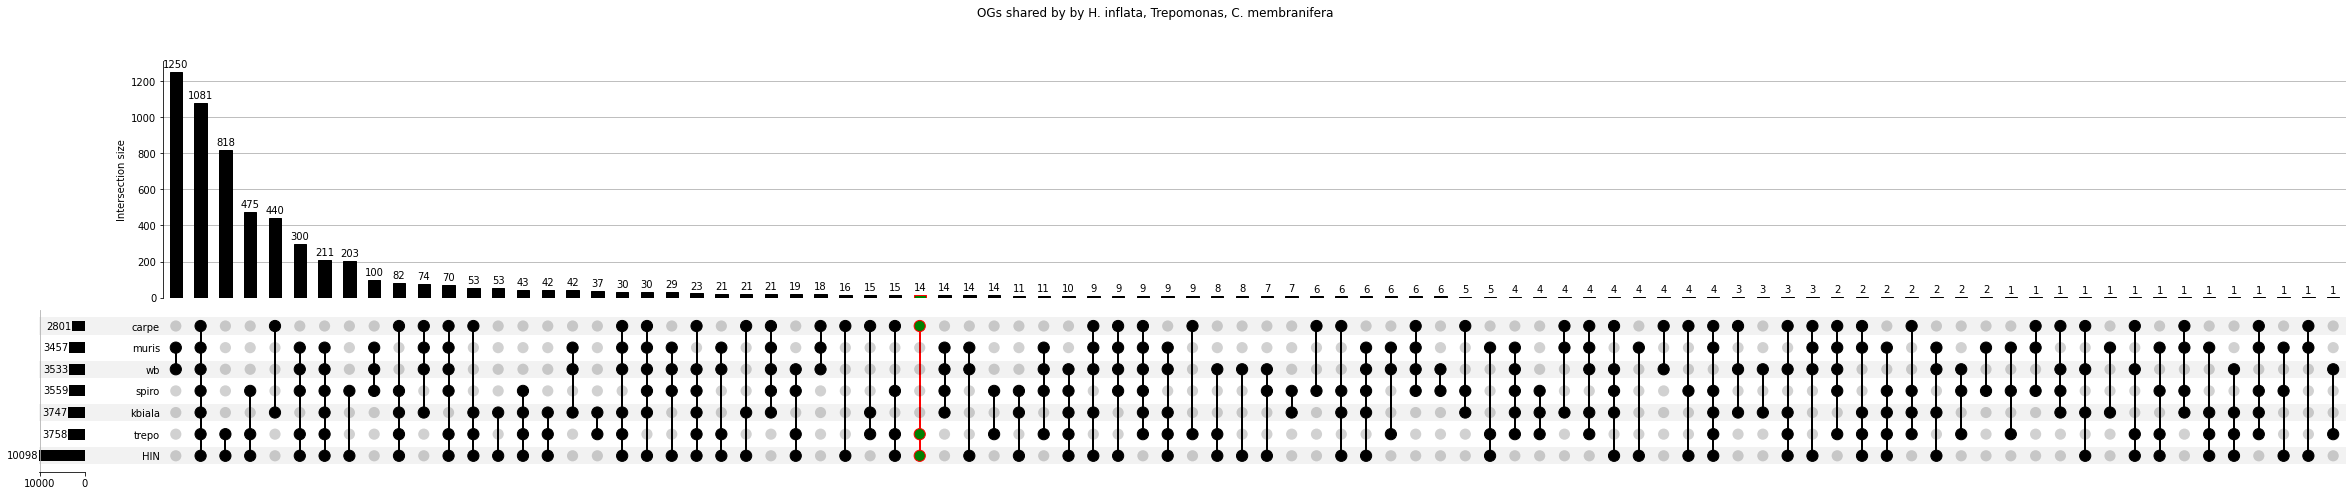

In [1]:
import pandas as pd
from upsetplot import UpSet
from matplotlib import pyplot as plt
from matplotlib import cm

"OG with at least two genes"
df_count = pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct10_7sp/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df_count = df_count.set_index("Orthogroup").sort_values(by="Total", ascending=False)
df_count.loc[df_count["Total"] > 1, "Type"] = "OG"

"Upset plot for only OG"
df_stack_cn = df_count.set_index(df_count.HIN >= 1).set_index(df_count.spiro >= 1, append=True).set_index(
    df_count.wb >= 1, append=True).set_index(df_count.muris >= 1, append=True).set_index(df_count.trepo >= 1, append=True
                                                                                             ).set_index(df_count.kbiala >= 1, append=True).set_index(df_count.carpe >= 1, append=True)

upset = UpSet(df_stack_cn,
              intersection_plot_elements=10,
              min_degree=2,
              show_counts=True,
              sort_categories_by="cardinality",
              sort_by="cardinality")


upset.style_subsets(absent=["spiro", "wb", "muris", "kbiala"],
                    min_degree=3,
                    facecolor="green",
                    edgecolor="red")

upset.plot()
plt.suptitle("OGs shared by by H. inflata, Trepomonas, C. membranifera")
plt.show()

## Extract genes from OGs

In [2]:
"OG shared by Free-livings HIN, trepo, kbiala, carpe"

df=pd.read_csv( "/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct10_7sp/Orthogroups/Orthogroups.GeneCount.tsv", sep="\t", header='infer')
df=df[["Orthogroup","HIN", "trepo", "spiro", "wb", "muris", "kbiala", "carpe", "Total"]]

og_hin_trepo_carpe=df[(df.iloc[:,[1,2,7]] >=1).all(1)  & (df.iloc[:,[3,4,5,6]] ==0).all(1)]

print("Number of OGs= ", len(og_hin_trepo_carpe["Orthogroup"]))
print("Total HIN genes =", og_hin_trepo_carpe["HIN"].sum())
print("Total trepo genes =", og_hin_trepo_carpe["trepo"].sum())
print("Total carpe genes =", og_hin_trepo_carpe["carpe"].sum())

og_hin_trepo_carpe.head()

Number of OGs=  14
Total HIN genes = 127
Total trepo genes = 23
Total carpe genes = 19


,Orthogroup,HIN,trepo,spiro,wb,muris,kbiala,carpe,Total
218,OG0000218,48,1,0,0,0,0,1,50
595,OG0000595,20,1,0,0,0,0,2,23
922,OG0000922,11,4,0,0,0,0,2,17
1620,OG0001620,7,3,0,0,0,0,2,12
2601,OG0002601,7,1,0,0,0,0,1,9


In [3]:
"OG gene list"
OG_gene_list = pd.read_csv('/Users/zeyku390/PycharmProjects/H.inflata/output/1_orthofinder/Results_Oct10_7sp/Orthogroups/Orthogroups.txt', header=None, dtype=str, delim_whitespace=True)
OG_gene_list = OG_gene_list.apply(lambda x: x.str.replace(":", ""))

"extract proteins from OG"
def extract_prot(OG_list):
    df = pd.merge(OG_gene_list, OG_list["Orthogroup"], right_on="Orthogroup", left_on=0).drop(
        columns="Orthogroup").set_index(0)
    return df.T

extract_prot(og_hin_trepo_carpe).head()

,OG0000218,OG0000595,OG0000922,OG0001620,OG0002601,OG0002927,OG0003238,OG0003512,OG0004143,OG0004425,OG0004677,OG0005299,OG0005913,OG0006391
1,HIN_007094,HIN_028183,HIN_015636,HIN_022247,HIN_003248,HIN_030561,HIN_005977,HIN_036140,HIN_042265,HIN_006124,HIN_025091,HIN_006976,HIN_044097,HIN_001923
2,HIN_007102,HIN_028187,HIN_026242,HIN_022254,HIN_026963,HIN_061185,HIN_006002,HIN_059946,HIN_053899,HIN_014329,HIN_027309,HIN_084324,HIN_052460,HIN_015615
3,HIN_007111,HIN_028191,HIN_026244,HIN_045398,HIN_026965,HIN_061187,HIN_029879,HIN_060467,HIN_079779,HIN_023830,HIN_040034,HIN_095513,HIN_095713,KAG9397090.1
4,HIN_007112,HIN_028242,HIN_039497,HIN_045403,HIN_028068,HIN_082072,HIN_029912,HIN_094127,KAG9390981.1,KAG9390485.1,KAG9391872.1,KAG9394397.1,KAG9394451.1,TPC1_13214
5,HIN_007164,HIN_028244,HIN_039913,HIN_045404,HIN_028071,HIN_086213,HIN_056820,KAG9391031.1,TPC1_30126,TPC1_13497,TPC1_10726,TPC1_12366,TPC1_11924,NaN


In [8]:
extract_prot(og_hin_trepo_carpe).to_csv("/Users/zeyku390/PycharmProjects/H.inflata/jupyter/1_orthofinder/data/og_hin_trepo_carpe.csv", header="infer", index=False, sep="\t")

## add annotation

In [4]:
import glob

"OG diplo subset gene list with annotations"


def OG_stack(OG_list):
    df = pd.merge(OG_gene_list, OG_list["Orthogroup"], right_on="Orthogroup", left_on=0).drop(
        columns="Orthogroup").rename(columns={0: "OG"}).set_index("OG")
    df = df.stack().reset_index().drop(columns=["level_1"])
    return df


df_og_stack = OG_stack(og_hin_trepo_carpe)

"Add annotations"
path = '/Users/zeyku390/PycharmProjects/H.inflata/jupyter/data/*.csv'
list_files = glob.glob(path)

#get species name from the filenames
sp_dic = {}
for element in list_files:
    i = element.split("_annot")[0]
    i = i.split("/")[-1]
    sp_dic[i] = element

dic_annot = {}
for key, value in sp_dic.items():
    dic_annot[key] = pd.read_csv(value, sep="\t", header="infer")


def add_annot(df, df_annot):
    df = pd.merge(df, df_annot, right_on="id", left_on=0, how="left").drop(columns=[0]).dropna()
    return df


df1 = add_annot(OG_stack(og_hin_trepo_carpe), dic_annot["HIN"])
df2 = add_annot(OG_stack(og_hin_trepo_carpe), dic_annot["trepo"])
df3 = add_annot(OG_stack(og_hin_trepo_carpe), dic_annot["carpe"])


df_og_stack_annot = pd.concat([df1, df2, df3], axis=0)
df_og_stack_annot

,OG,id,desc
0,OG0000218,HIN_007094,HIN_007094 Conserved hypothetical protein
1,OG0000218,HIN_007102,HIN_007102 Conserved hypothetical protein
2,OG0000218,HIN_007111,HIN_007111 Conserved hypothetical protein
3,OG0000218,HIN_007112,HIN_007112 Conserved hypothetical protein
4,OG0000218,HIN_007164,HIN_007164 Conserved hypothetical protein
...,...,...,...
146,OG0004425,KAG9390485.1,KAG9390485.1 Rab-GTPase-TBC domain [Carpediemo...
152,OG0004677,KAG9391872.1,KAG9391872.1 hypothetical protein J8273_6825 [...
158,OG0005299,KAG9394397.1,KAG9394397.1 SNARE domain [Carpediemonas membr...
163,OG0005913,KAG9394451.1,KAG9394451.1 Ring finger domain [Carpediemonas...


In [5]:
df_og_stack_annot.to_csv("/Users/zeyku390/PycharmProjects/H.inflata/jupyter/1_orthofinder/data/og_hin_trepo_carpe_annot.csv",
                         sep="\t", header="infer", index=False)